# **Israel Elections Data Analysis**

## Gil Shiloh
## Dean Tesler
## Elky Sandor

An example notebook showing how to read and display the Israel 2021 elections results. This is the notebook for the first week.

In [ ]:
# Add a check if we run in google colab or locally in jupyter notebook
run_in_colab = False
if 'google.colab' in str(get_ipython()):
    run_in_colab = True
    print('Running on CoLab')
else:
    print('Running locally on Jupyter')



Running on CoLab


In [ ]:
# First install tha needed packages using conda in the current Jupyter kernel
# Run once - should take a long time!
import sys
#if not(run_in_colab):
#  !conda install --yes --prefix {sys.prefix} numpy
#  !conda install --yes --prefix {sys.prefix} pandas
#  !conda install --yes --prefix {sys.prefix} matplotlib
#  !conda install --yes --prefix {sys.prefix} statsmodels  # statistical modelling 
#  !conda install --yes --prefix {sys.prefix} xlrd  # read excel 



# Alternatively, if your python wasn't installed using anaconda, we can use pip install: 
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib


In [ ]:
# Import modules 
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
import statsmodels.api as sm  # a module for statistical modelling (e.g. regression analysis)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


First, we need to mount our local drive to the colab network

In [ ]:
# Mount drive in google colab
if run_in_colab:
    from google.colab import drive
    drive.mount('/content/drive')
else:  # Set local path 
    data_path = "C:/Users/Or Zuk/Google Drive/HUJI/Teaching/Lab_52568/Data/Elections/"  


Mounted at /content/drive


In [ ]:
# Loading elections 2021 elections data:
if run_in_colab:
    from google.colab import files
    uploaded = files.upload()

Saving votes per ballot 2021.csv to votes per ballot 2021.csv
Saving votes per city 2021.csv to votes per city 2021.csv


In [ ]:
import io

data_type = "city" # "ballot"  # city
if   run_in_colab:
    df_2020_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
else:  # read local file
    if data_type == "ballot":
        df_2020_raw = pd.read_csv(data_path + 'votes per ballot 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
        # preprocessing of ballot
        df_2020 = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
        df_2020 = df_2020[df_2020.columns[8:-1]] # removing "metadata" columns
    else:
        df_2020_raw = pd.read_csv(data_path + 'votes per city 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
        # preprocessing of cities 
        df_2020 = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
        df_2020 = df_2020[df_2020.columns[5:-1]] # removing "metadata" columns
# Dataset is now stored in a Pandas Dataframe
print(df_2020_raw.columns)
df_2020_raw.head()

Index(['סמל ועדה', 'סמל ישוב', 'בזב', 'מצביעים', 'פסולים', 'כשרים', 'אמת', 'ב',
       'ג', 'ודעם', 'ז', 'זץ', 'ט', 'י', 'יז', 'ינ', 'יף', 'יק', 'יר', 'כ',
       'כך', 'כן', 'ל', 'מחל', 'מרצ', 'נ', 'ני', 'נר', 'עם', 'פה', 'ףז', 'צי',
       'צכ', 'צף', 'ץ', 'ק', 'קי', 'קך', 'קץ', 'ר', 'רנ', 'רף', 'רק', 'שס',
       'ת', 'Unnamed: 46'],
      dtype='object')


,סמל ועדה,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ב,ג,ודעם,ז,זץ,ט,י,יז,ינ,יף,יק,יר,כ,כך,כן,ל,מחל,מרצ,נ,ני,נר,עם,פה,ףז,צי,צכ,צף,ץ,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת,Unnamed: 46
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבירים,6,1220,221,151,1,150,47,0,0,3,0,0,2,0,3,0,0,0,0,0,0,16,2,5,31,0,0,0,0,27,0,0,0,0,0,0,0,0,0,5,0,0,0,1,8,NaN
אדירים,5,113,234,180,0,180,1,7,4,0,0,0,9,0,1,0,0,0,0,0,0,3,0,84,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,61,6,NaN
אושה,8,278,382,276,0,276,72,7,0,3,0,0,0,0,2,0,0,1,0,0,0,37,8,24,20,0,0,0,0,86,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15,NaN
אחווה,17,1157,183,145,0,145,14,4,0,0,0,0,4,0,0,0,0,0,0,0,0,36,3,27,10,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8,NaN
איבים,17,338,138,40,0,40,0,4,0,0,0,1,10,0,0,0,0,0,0,0,0,5,0,17,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,NaN


In [ ]:
df_2020 = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2020 = df_2020[df_2020.columns[5:-1]] # removing "metadata" columns
print("{} votes in March 2020".format(df_2020_raw['כשרים']['מעטפות חיצוניות']) + ' מעטפות חיצוניות ')



421619 votes in March 2020 מעטפות חיצוניות 


In [ ]:
print(df_2020_raw.columns)
df_2020.head()


Index(['סמל ועדה', 'סמל ישוב', 'בזב', 'מצביעים', 'פסולים', 'כשרים', 'אמת', 'ב',
       'ג', 'ודעם', 'ז', 'זץ', 'ט', 'י', 'יז', 'ינ', 'יף', 'יק', 'יר', 'כ',
       'כך', 'כן', 'ל', 'מחל', 'מרצ', 'נ', 'ני', 'נר', 'עם', 'פה', 'ףז', 'צי',
       'צכ', 'צף', 'ץ', 'ק', 'קי', 'קך', 'קץ', 'ר', 'רנ', 'רף', 'רק', 'שס',
       'ת', 'Unnamed: 46'],
      dtype='object')


,אמת,ב,ג,ודעם,ז,זץ,ט,י,יז,ינ,יף,יק,יר,כ,כך,כן,ל,מחל,מרצ,נ,ני,נר,עם,פה,ףז,צי,צכ,צף,ץ,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבירים,47,0,0,3,0,0,2,0,3,0,0,0,0,0,0,16,2,5,31,0,0,0,0,27,0,0,0,0,0,0,0,0,0,5,0,0,0,1,8
אדירים,1,7,4,0,0,0,9,0,1,0,0,0,0,0,0,3,0,84,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,61,6
אושה,72,7,0,3,0,0,0,0,2,0,0,1,0,0,0,37,8,24,20,0,0,0,0,86,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15
אחווה,14,4,0,0,0,0,4,0,0,0,0,0,0,0,0,36,3,27,10,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8
איבים,0,4,0,0,0,1,10,0,0,0,0,0,0,0,0,5,0,17,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
df_2020.describe()


,אמת,ב,ג,ודעם,ז,זץ,ט,י,יז,ינ,יף,יק,יר,כ,כך,כן,ל,מחל,מרצ,נ,ני,נר,עם,פה,ףז,צי,צכ,צף,ץ,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת
count,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.00000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.0,1215.000000,1215.000000
mean,221.207407,225.379424,204.437037,174.965432,0.325103,0.545679,185.712757,0.667490,28.710288,0.335802,0.161317,0.353086,0.210700,0.364609,1.062551,240.540741,204.419753,878.100412,166.434568,0.40000,0.353086,0.181070,137.501235,505.441975,1.077366,0.362963,0.208230,0.186008,0.316872,0.381070,0.325103,0.423045,0.600000,14.276543,0.978601,0.487243,0.0,260.088889,172.148971
std,1630.890978,1448.009636,2434.859254,924.732474,2.898415,3.250803,1149.958744,4.141412,169.416802,1.836611,1.077852,2.309911,1.226446,2.641308,5.867514,1420.368827,1282.323553,4842.233477,1314.651320,3.15962,2.363145,1.460113,677.210580,3064.015473,14.734630,2.696775,1.443133,1.226412,2.452683,3.373333,2.498201,2.369937,3.680126,72.194177,5.682239,3.259450,0.0,1759.336035,983.868998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.500000,22.000000,4.000000,0.00000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,7.000000
50%,36.000000,19.000000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,7.000000,60.000000,23.000000,0.00000,0.000000,0.000000,0.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,3.000000,16.000000
75%,92.000000,49.000000,3.000000,3.000000,0.000000,0.000000,42.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,16.000000,161.000000,68.000000,0.00000,0.000000,0.000000,0.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.0,24.000000,31.500000
max,38780.000000,39693.000000,58585.000000,14632.000000,88.000000,93.000000,27130.000000,82.000000,3876.000000,41.000000,28.000000,46.000000,30.000000,69.000000,105.000000,28301.000000,27483.000000,103036.000000,36739.000000,95.00000,58.000000,44.000000,10626.000000,58019.000000,501.000000,79.000000,43.000000,34.000000,69.000000,106.000000,77.000000,59.000000,101.000000,1303.000000,144.000000,77.000000,0.0,39151.000000,22077.000000


In [ ]:
# df_2020.reset_index(inplace=True)
df_2020.style.set_properties(**{'text-align': 'left'})
df_2020.head()
df_2020[1:4]


,אמת,ב,ג,ודעם,ז,זץ,ט,י,יז,ינ,יף,יק,יר,כ,כך,כן,ל,מחל,מרצ,נ,ני,נר,עם,פה,ףז,צי,צכ,צף,ץ,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אדירים,1,7,4,0,0,0,9,0,1,0,0,0,0,0,0,3,0,84,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,61,6
אושה,72,7,0,3,0,0,0,0,2,0,0,1,0,0,0,37,8,24,20,0,0,0,0,86,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15
אחווה,14,4,0,0,0,0,4,0,0,0,0,0,0,0,0,36,3,27,10,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8


In [ ]:
df_2020.iloc[5]

אמת      0
ב        0
ג        0
ודעם    48
ז        0
זץ       0
ט        0
י        0
יז       0
ינ       0
יף       0
יק       0
יר       0
כ        0
כך       0
כן       0
ל        0
מחל      4
מרצ      0
נ        0
ני       0
נר       0
עם      32
פה       0
ףז       0
צי       0
צכ       0
צף       0
ץ        0
ק        0
קי       0
קך       0
קץ       0
ר        0
רנ       0
רף       0
רק       0
שס       0
ת        0
Name: אלעריאן, dtype: int64

In [ ]:
df_2020.loc['הרצליה']

אמת      5127
ב        2680
ג         449
ודעם       92
ז           5
זץ          3
ט         959
י           8
יז        511
ינ          1
יף          1
יק          1
יר          2
כ           2
כך         11
כן       6908
ל        2413
מחל     11580
מרצ      4557
נ           2
ני          3
נר          0
עם          9
פה      14701
ףז         12
צי          7
צכ          2
צף          1
ץ           1
ק           4
קי          1
קך          5
קץ          7
ר         215
רנ         17
רף          1
רק          0
שס       1677
ת        2996
Name: הרצליה, dtype: int64

Now let's do some plotting

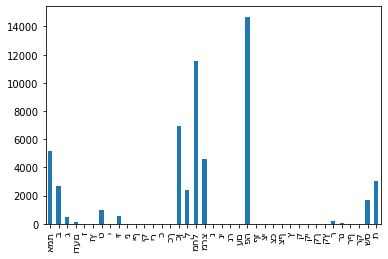

In [ ]:
from matplotlib import pyplot as plt
df_2020.loc['הרצליה'].plot.bar()

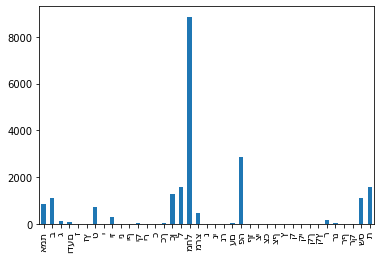

In [ ]:
df_2020.loc['אילת'].plot.bar()

Next, we create a function for showing a bar plot of the voting **percentage** in a given city, while showing only the parties above a % threshold 

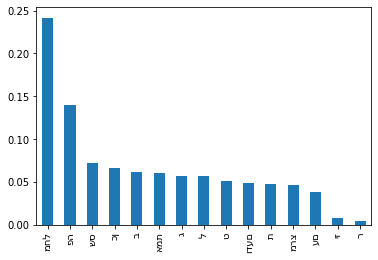

In [ ]:
# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]

total_votes = parties_votes_percents(df_2020, 0.001)  # total votes for each party
total_votes.plot.bar()



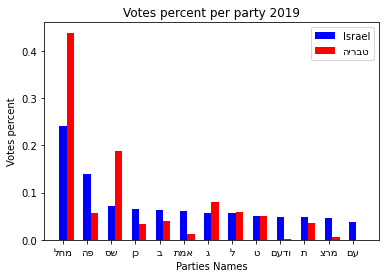

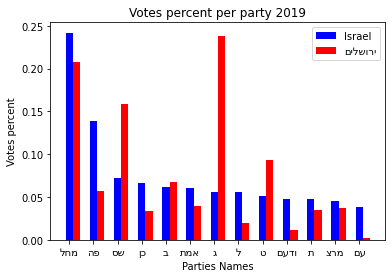

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2561131550>)

In [ ]:
# Bar plot for a party, only showing values above a certain threshold
def party_bar(df, thresh, city):
    width = 0.3  # set column width 
    votes = parties_votes_percents(df, thresh)  # total votes for each party
    n = len(votes)  # number of parties
    names = votes.keys()

    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  # plt.subplots()

    city_votes = df.loc[city,names] / df.loc[city,names].sum()
    all_bar = ax.bar(np.arange(n), list(votes), width, color='b')
    city_bar = ax.bar(np.arange(n)+width, list(city_votes), width, color='r')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Votes percent per party 2019')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.legend((all_bar[0], city_bar[0]), ('Israel', city[::-1]))
    plt.show()

    return fig, ax


party_bar(df_2020, 0.0325, 'טבריה')
party_bar(df_2020, 0.0325, 'ירושלים')

Show histogram of number of votes for a column
 


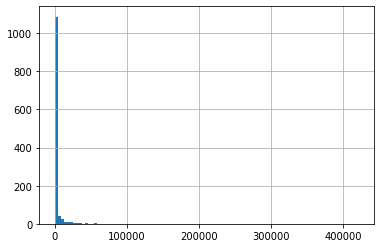

In [ ]:
df_2020_raw['כשרים'].hist(bins=100)

#**Solution**:

# A

In [ ]:
df_2020_raw.head()
disqulify = df_2020_raw["פסולים"]
all_votes = df_2020_raw["מצביעים"]
print(df_2020_raw.columns)


Index(['סמל ועדה', 'סמל ישוב', 'בזב', 'מצביעים', 'פסולים', 'כשרים', 'אמת', 'ב',
       'ג', 'ודעם', 'ז', 'זץ', 'ט', 'י', 'יז', 'ינ', 'יף', 'יק', 'יר', 'כ',
       'כך', 'כן', 'ל', 'מחל', 'מרצ', 'נ', 'ני', 'נר', 'עם', 'פה', 'ףז', 'צי',
       'צכ', 'צף', 'ץ', 'ק', 'קי', 'קך', 'קץ', 'ר', 'רנ', 'רף', 'רק', 'שס',
       'ת', 'Unnamed: 46'],
      dtype='object')


above we can see all the columns of the data


Text(0, 0.5, 'Amount of citys')

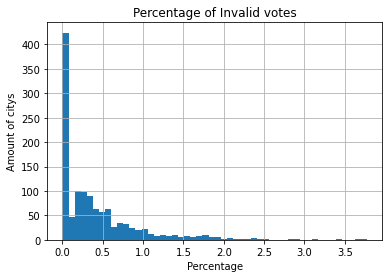

In [ ]:
perc = (disqulify / all_votes) * 100
my_hist = perc.hist(bins=50)
my_hist.set_title("Percentage of Invalid votes")
my_hist.set_xlabel('Percentage')
my_hist.set_ylabel('Amount of citys')


In [ ]:
top_3 = perc.sort_values(ascending=False)
# top_3.head(3) 

שם ישוב
סואעד חמרייה    3.773585
ניין            3.648649
מאיר שפיה       3.448276
dtype: float64

we saw that סואעד חמרייה with 3.773 percent and ניין with 3.648 percent and מאיר שפיה with 3.448 percent are the cities with the most invalid votes

# B

In [ ]:
def comparision_party_bar(df, thresh, city1 , city2):
    width = 0.4  # set column width 
    votes = parties_votes_percents(df, thresh)  # total votes for each party
    n = len(votes)  # number of parties
    names = votes.keys()

    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  # plt.subplots()

    city_votes1 = df.loc[city1,names] / df.loc[city1,names].sum()
    city_votes2 = df.loc[city2,names] / df.loc[city2,names].sum()    
    city_bar1 = ax.bar(np.arange(n)+width, list(city_votes1*100), width, color='r')
    city_bar2 = ax.bar(np.arange(n), list(city_votes2*100), width, color='black')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Votes percent per party 2021')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.legend((city_bar1[0], city_bar2[0]), (city1[::-1], city2[::-1]))
    plt.show()

    return fig , ax

# print(df_2020_raw['מצביעים'].loc[(df_2020_raw['מצביעים']>50000)])
# print(df_2020_raw['מצביעים'].loc[((5000<df_2020_raw['מצביעים']) & (df_2020_raw['מצביעים']<50000))])
# print(df_2020_raw['מצביעים'].loc[df_2020_raw['מצביעים']<5000])
# here we printed by the division in the quastion and choose 2 from each series

שם ישוב
אשדוד              111019
אשקלון              68124
באר שבע             92304
חיפה               137706
פתח תקווה          128425
ראשון לציון        134508
רחובות              72849
בת ים               60202
ירושלים            250088
כפר סבא             56750
בני ברק             83372
חולון               97226
רמת גן              87996
תל אביב  יפו       263478
נתניה              105653
הרצליה              55141
מעטפות חיצוניות    425512
Name: מצביעים, dtype: int64
שם ישוב
טבריה        19755
שדרות        12793
אופקים       13859
אילת         21139
גני תקווה    11774
             ...  
כפר יונה     12535
מיתר          5523
טייבה        12675
טירה          8806
קלנסווה       5191
Name: מצביעים, Length: 98, dtype: int64
שם ישוב
אבירים       151
אדירים       180
אושה         276
אחווה        145
איבים         40
            ... 
נווה זיו     418
קורנית       491
שורשים       290
שכניה        445
שער אפרים    923
Name: מצביעים, Length: 1100, dtype: int64


above we can see 3 series, each one for cities capacity as asked


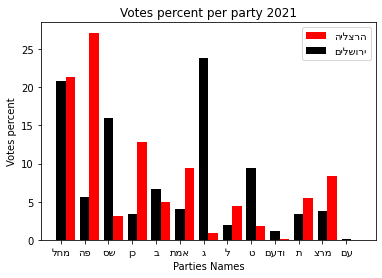

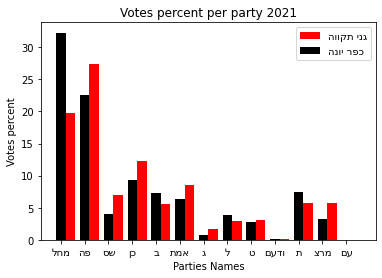

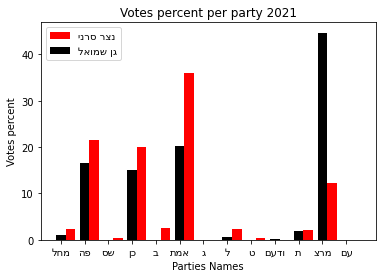

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f256065db50>)

In [ ]:
comparision_party_bar(df_2020, 0.0325, 'הרצליה', 'ירושלים')
comparision_party_bar(df_2020, 0.0325, 'גני תקווה', 'כפר יונה')
comparision_party_bar(df_2020, 0.0325, 'נצר סרני', 'גן שמואל')

In the first graph of the big cities we can se that for most of the parties the voting is the same, besides the big differnce in the voting in jersualem for the religios parties. The religios party votes are taken mostly from "Yesh Atid".
In the seconed graph of the medium size cities, we can see that most of the votes are the same, but different from the big cities votes.
In the small size graphs we can see that the votes are between less parties, and the distributions of the votes are very different from the other size cities.


# C
###1

In [ ]:
def parties_votes_percents_2(df, thresh):
    par = df.sum().div(df.sum().sum())
    return par[par >= thresh]

overall = parties_votes_percents_2(df_2020, 0)
lst_of_metrica = []
for city in df_2020.index:
  overall_city = df_2020.loc[city] / df_2020.loc[city].sum()
  dist = (overall-overall_city).pow(2)
  lst_of_metrica.append(dist.sum()) 
lst_of_metrica = np.array(lst_of_metrica)
idx = np.argpartition(lst_of_metrica,2)
best = df_2020.iloc[idx[1:3]] # the best 2  cities by our dist func
# print(best.index)

idx_2 = np.argpartition(lst_of_metrica,-2)
worst = df_2020.iloc[idx_2[-2:]] # the worst 2  cities by our dist func
# print(worst.index)


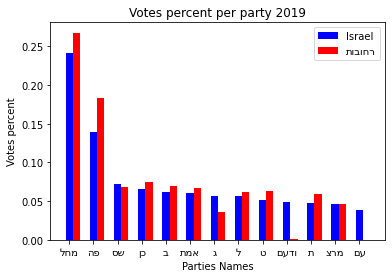

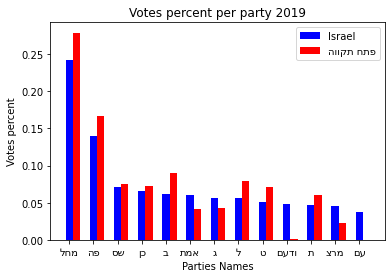

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2560b7f850>)

In [ ]:
party_bar(df_2020, 0.0325, 'רחובות')
party_bar(df_2020, 0.0325, 'פתח תקווה')

After our calculation we would expect from each graph to show a place that his votes distribuation will be close to the overall distribution of Israel. We found that Rehovot and Petach Tikva have the closest distribution to Israel.
In the graphs we can see that the distributions almost mutual. 

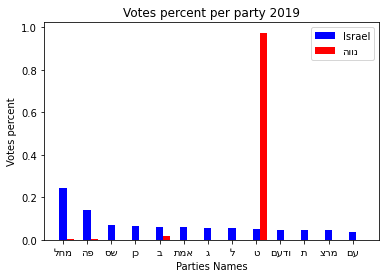

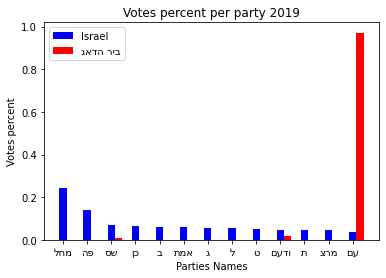

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2560281050>)

In [ ]:
party_bar(df_2020, 0.035, 'נווה')
party_bar(df_2020, 0.035, 'ביר הדאג')

The reason these 2 citys have the most different distribution from Israel is that most of the citizens in those places voted to 1 party where in Israel that spesific party got very few percantage of votes.